<a href="https://colab.research.google.com/github/Sanskar6877/ChestXRay_Pneumonia_Detection/blob/main/Model3_Resnet50_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# re-size all the images
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/chest_xray/train'
valid_path = '/content/drive/MyDrive/chest_xray/val'
test_path = '/content/drive/MyDrive/chest_xray/test'

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/chest_xray/train/*')

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# creating a model object
model = Model(inputs=resnet.input, outputs=prediction)


In [ ]:
print(prediction[0])

KerasTensor(type_spec=TensorSpec(shape=(2,), dtype=tf.float32, name=None), name='tf.__operators__.getitem/strided_slice:0', description="created by layer 'tf.__operators__.getitem'")


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   featurewise_center=False,  # set input mean to 0 over the dataset
                                  samplewise_center=False,  # set each sample mean to 0
                                 featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                 samplewise_std_normalization=False,  # divide each input by its std
                                 zca_whitening=False,  # apply ZCA whitening
                              rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
                             zoom_range = 0.2, # Randomly zoom image
                            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                           height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                         horizontal_flip = True,  # randomly flip images
                        vertical_flip=False)

val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

# providing the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')



val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


In [ ]:
# fiting the model
r = model.fit(
  training_set,
  validation_data=val_set,
  epochs=10, #10,15,20
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

Epoch 1/10
132/132 [==============================] - 1312s 10s/step - loss: 1.0502 - accuracy: 0.7328 - val_loss: 0.4425 - val_accuracy: 0.8350
Epoch 2/10
132/132 [==============================] - 117s 889ms/step - loss: 0.3872 - accuracy: 0.8343 - val_loss: 0.3416 - val_accuracy: 0.8271
Epoch 3/10
132/132 [==============================] - 122s 921ms/step - loss: 0.3745 - accuracy: 0.8466 - val_loss: 0.4881 - val_accuracy: 0.7109
Epoch 4/10
132/132 [==============================] - 117s 885ms/step - loss: 0.3887 - accuracy: 0.8461 - val_loss: 0.2492 - val_accuracy: 0.8789
Epoch 5/10
132/132 [==============================] - 113s 860ms/step - loss: 0.5928 - accuracy: 0.8087 - val_loss: 0.3724 - val_accuracy: 0.8105
Epoch 6/10
132/132 [==============================] - 117s 885ms/step - loss: 0.3318 - accuracy: 0.8663 - val_loss: 0.2181 - val_accuracy: 0.8154
Epoch 7/10
132/132 [==============================] - 115s 872ms/step - loss: 0.3573 - accuracy: 0.8528 - val_loss: 0.2194 - 

In [ ]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:',test_loss)

20/20 - 8s - loss: 0.3142 - accuracy: 0.7323 - 8s/epoch - 404ms/step
Test accuracy: 0.7323718070983887
Test loss: 0.31420705318450926


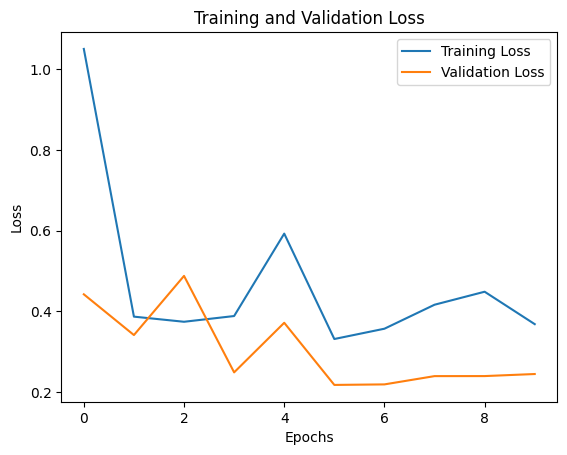

In [ ]:
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

from sklearn.metrics import classification_report,precision_score, recall_score, f1_score

# Predict probabilities for the test set
y_pred_probs = model.predict(test_set)
# Convert probabilities to class labels
y_pred_labels = (y_pred_probs > 0.5).astype(int)

# Get true labels for the test set
true_labels = test_set.labels
precision = precision_score(true_labels, y_pred_labels)
recall = recall_score(true_labels, y_pred_labels)
f1 = f1_score(true_labels, y_pred_labels)

# Print precision, recall, and F1-score
print("Precision of the model is - ", precision)
print("Recall of the model is - ", recall)
print("F1-score of the model is - ", f1)




Precision of the model is -  0.73458
Recall of the model is -  0.73659
F1-score of the model is -  0.81289
